<a href="https://colab.research.google.com/github/Kshitij15042004/PROJECTS/blob/main/Rainfall_prediction_mlmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***INDIA'S RAINFALL PREDICTION USING ML ALGORITHMNS***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/rainfall in india 1901-2015.csv").fillna(0)
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [ ]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
df.describe()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.938897,21.789431,27.319315,43.085520,85.682920,229.954762,346.623834,289.981414,197.074223,95.344582,39.759621,18.824733,1402.095821,40.688387,155.560860,1062.137974,153.613776
std,33.140898,33.574242,35.901220,46.936787,67.811512,123.211711,234.705204,269.690148,188.895403,135.518992,99.512313,68.624424,42.328296,907.896986,59.285415,201.228532,708.822281,166.902936
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.000000,174.800000,155.650000,100.400000,14.500000,0.600000,0.100000,795.075000,4.100000,23.800000,571.825000,33.500000
50%,1958.000000,6.000000,6.700000,7.800000,15.600000,36.400000,138.650000,284.400000,259.250000,173.700000,64.900000,9.500000,3.000000,1118.650000,19.100000,74.450000,880.250000,97.400000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.500000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['SUBDIVISION'].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [ ]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.938897
FEB          21.789431
MAR          27.319315
APR          43.085520
MAY          85.682920
JUN         229.954762
JUL         346.623834
AUG         289.981414
SEP         197.074223
OCT          95.344582
NOV          39.759621
DEC          18.824733
ANNUAL     1402.095821
Jan-Feb      40.688387
Mar-May     155.560860
Jun-Sep    1062.137974
Oct-Dec     153.613776
dtype: float64

In [ ]:
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
df.head(25)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [ ]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [ ]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [ ]:
df.shape

(4116, 19)

<ipython-input-16-2b948c0c3eb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


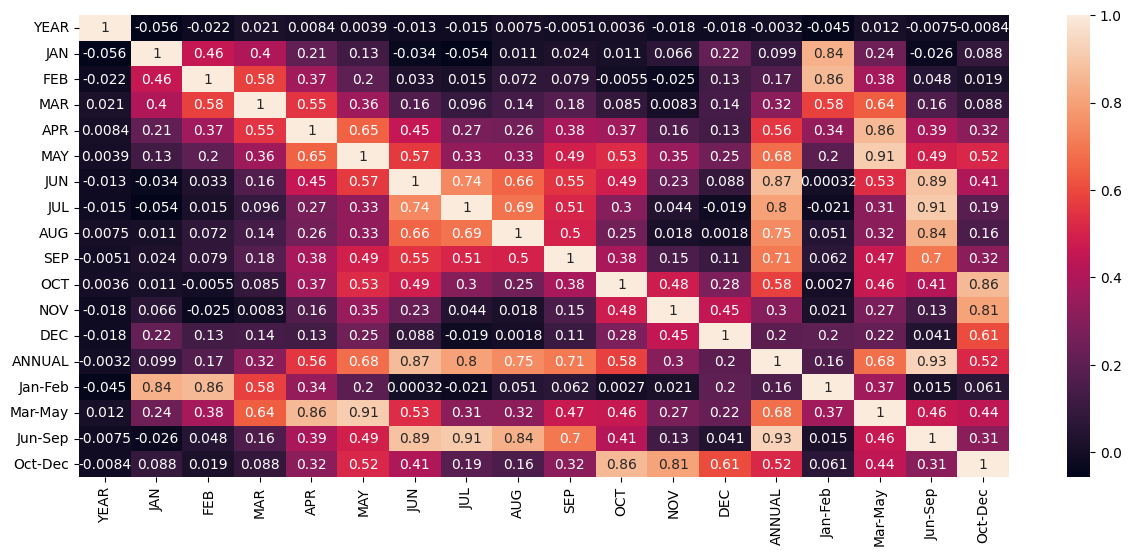

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

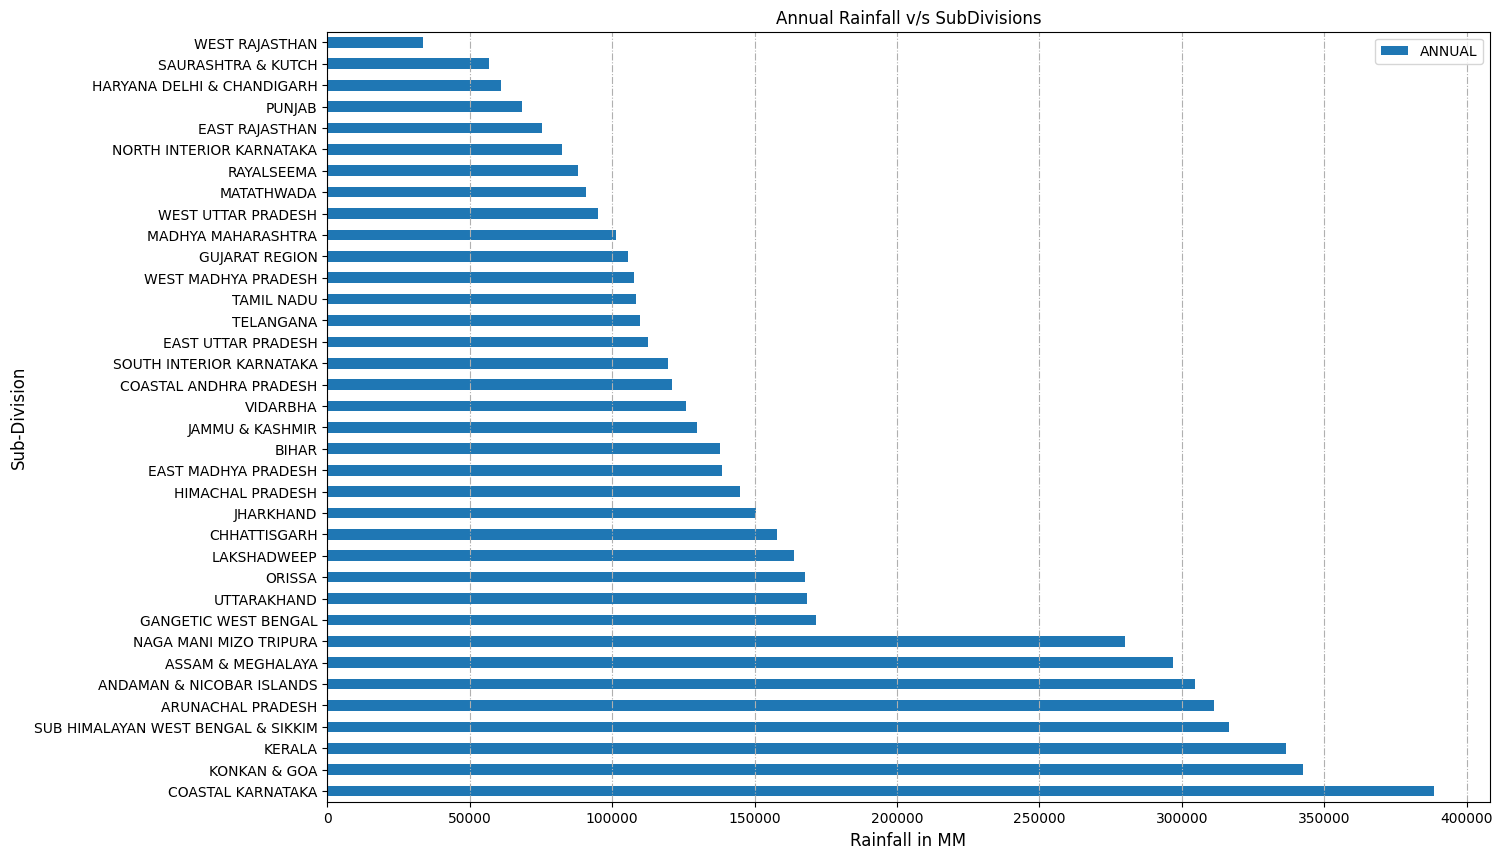

In [ ]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

<ipython-input-18-64cf992d7485>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")


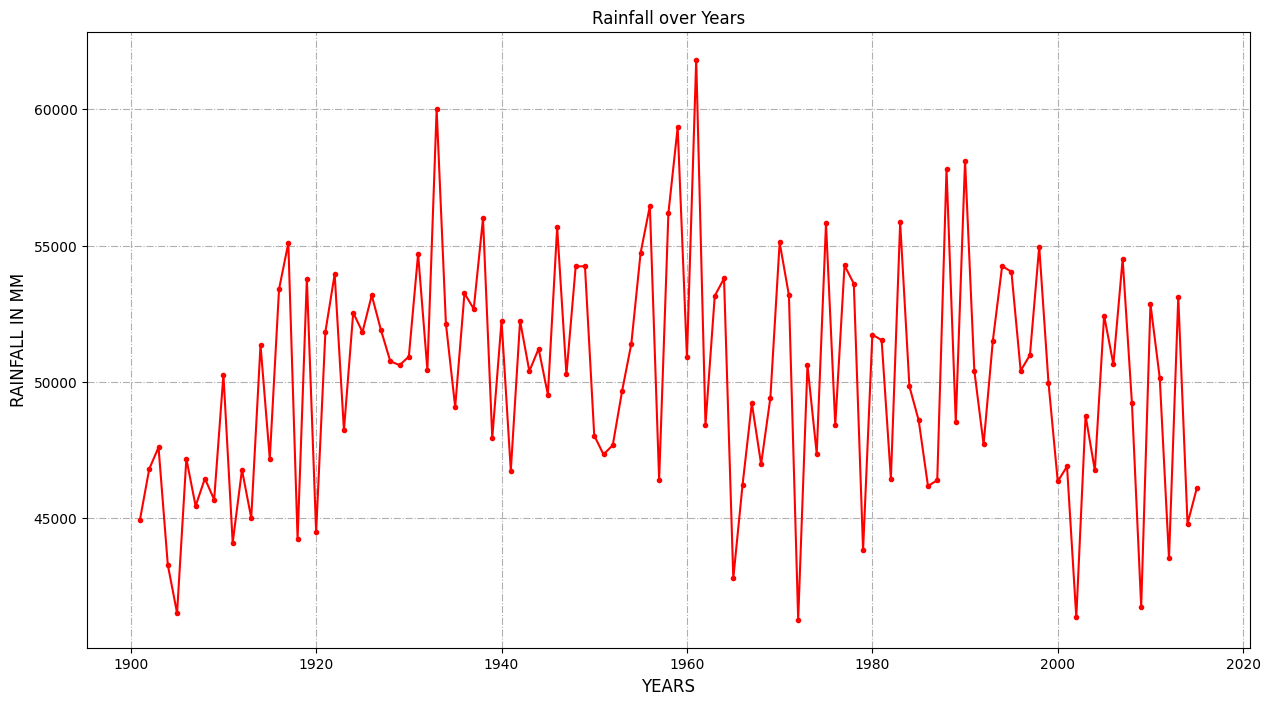

In [ ]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

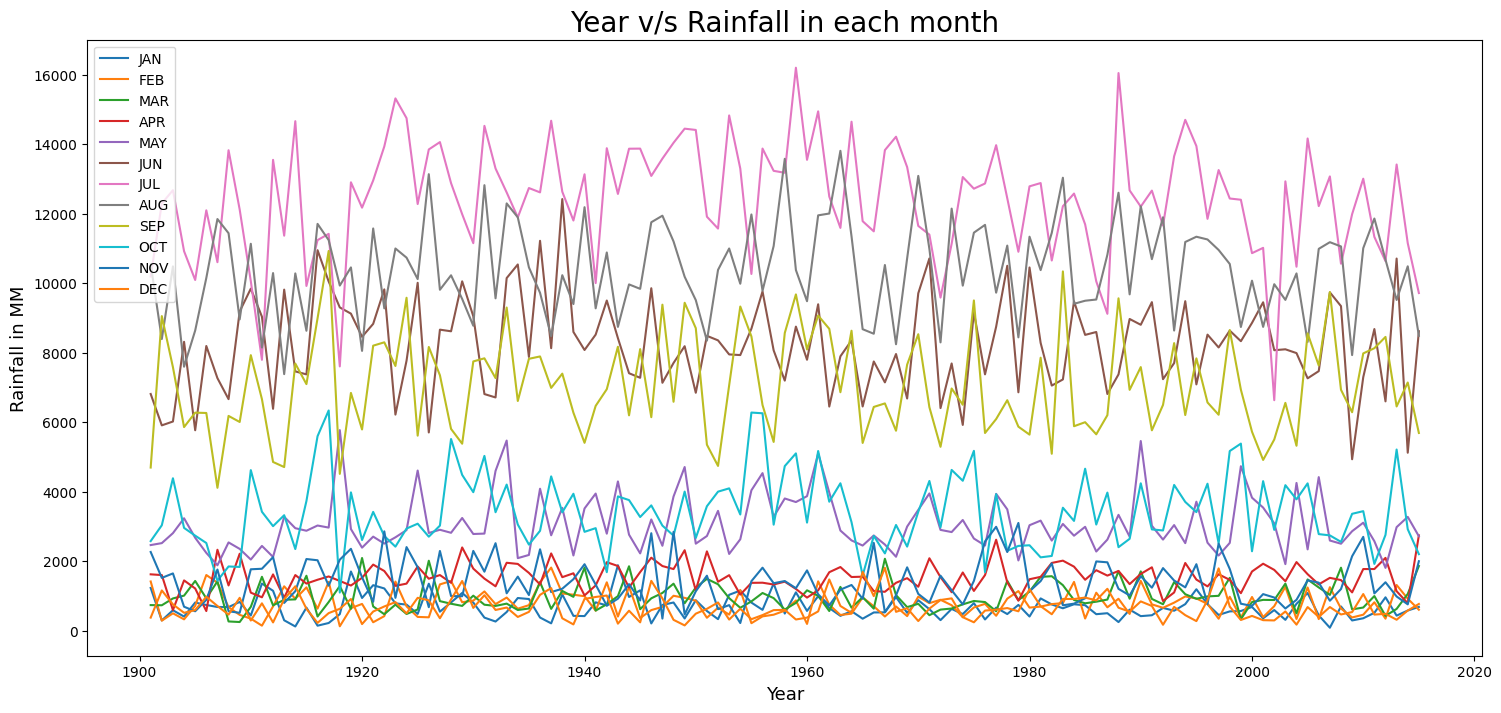

In [ ]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

In [ ]:
V = df.loc[((df['SUBDIVISION'] == 'VIDARBHA'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2852,VIDARBHA,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0,1093.3,76.6,64.3,917.2,35.2
2853,VIDARBHA,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7,748.9,1.7,10.6,664.3,72.4
2854,VIDARBHA,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0,1229.4,9.3,40.3,1077.0,102.8
2855,VIDARBHA,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9,753.2,6.7,27.9,655.9,62.7
2856,VIDARBHA,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0,941.8,20.0,42.6,873.1,6.2


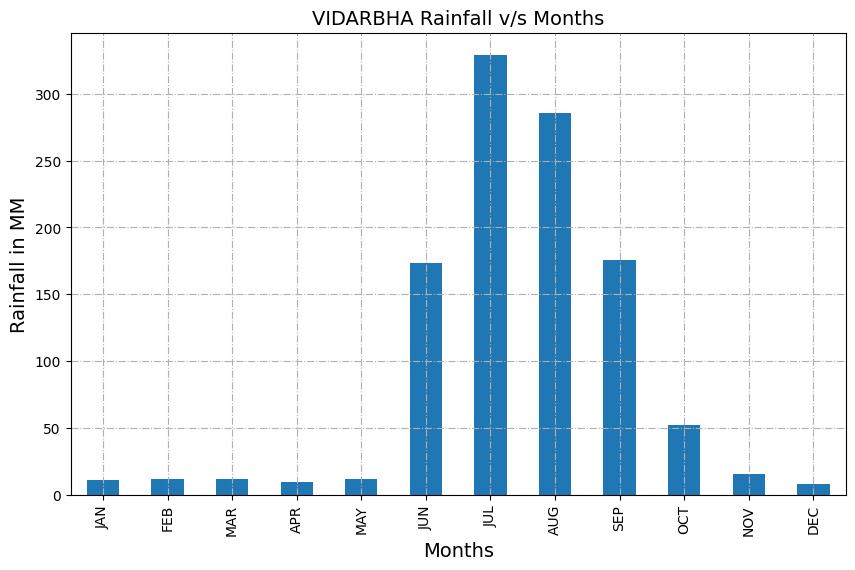

In [ ]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("VIDARBHA Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

<ipython-input-22-51be22797365>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));


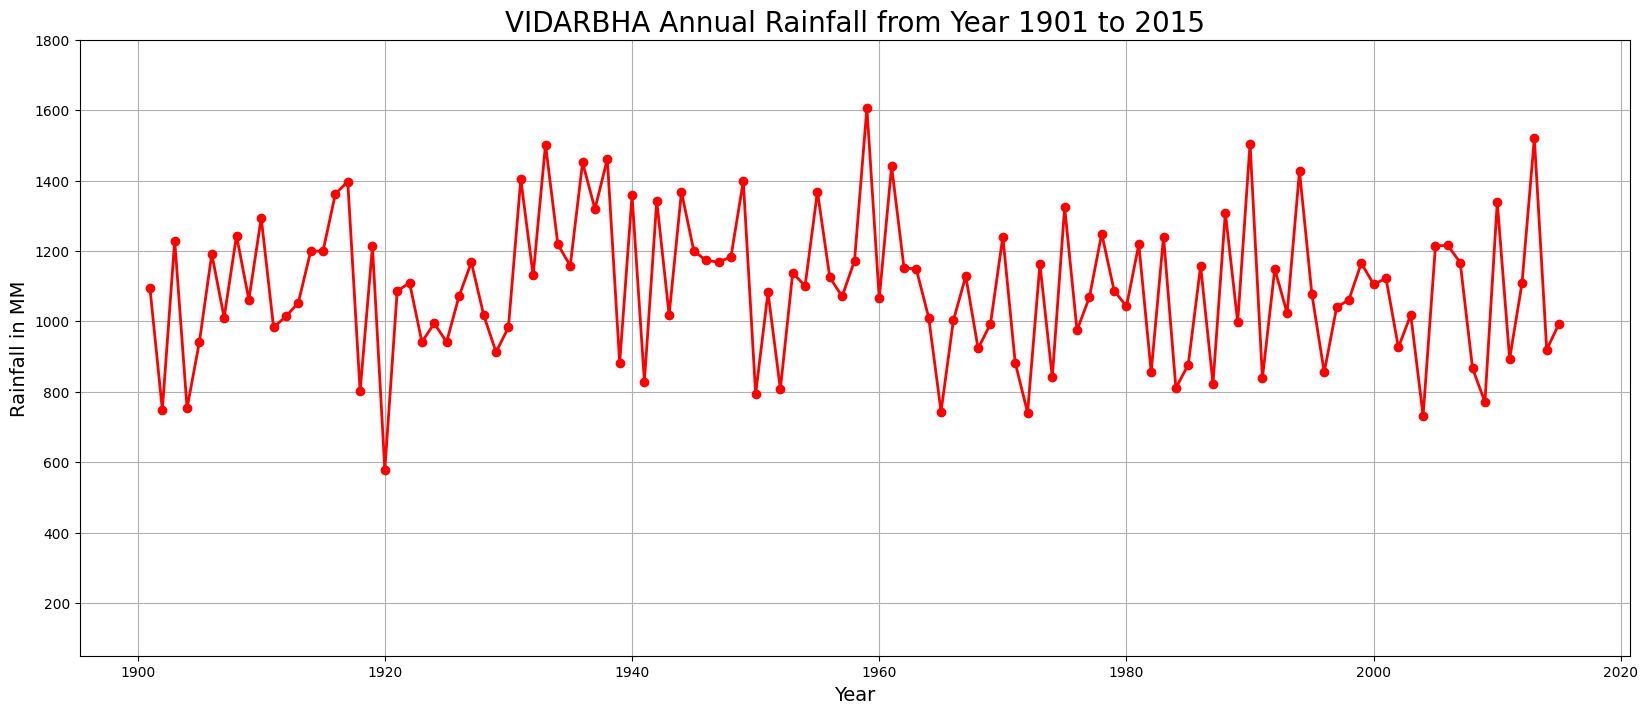

In [ ]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('VIDARBHA Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

In [ ]:
df["SUBDIVISION"].nunique()

36

In [ ]:
group = df.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
df=group.get_group(('VIDARBHA'))
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2852,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0
2853,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7
2854,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0
2855,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9
2856,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0


In [ ]:
group = df.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df=group.get_group(('VIDARBHA'))
df.head()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,36.8
1,1,1902,JAN,1.6
2,2,1903,JAN,5.2
3,3,1904,JAN,4.3
4,4,1905,JAN,7.3


In [ ]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [ ]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [ ]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [ ]:
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,36.8
115,115,1901,FEB,39.9
230,230,1901,MAR,30.9
345,345,1901,APR,26.1
460,460,1901,MAY,7.3


In [ ]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,36.8
115,115,1901,2,39.9
230,230,1901,3,30.9
345,345,1901,4,26.1
460,460,1901,5,7.3
575,575,1901,6,129.7
690,690,1901,7,295.3
805,805,1901,8,368.8
920,920,1901,9,123.4
1035,1035,1901,10,35.2


In [ ]:
df2.drop(columns="Index",inplace=True)

In [ ]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,36.8
115,1901,2,39.9


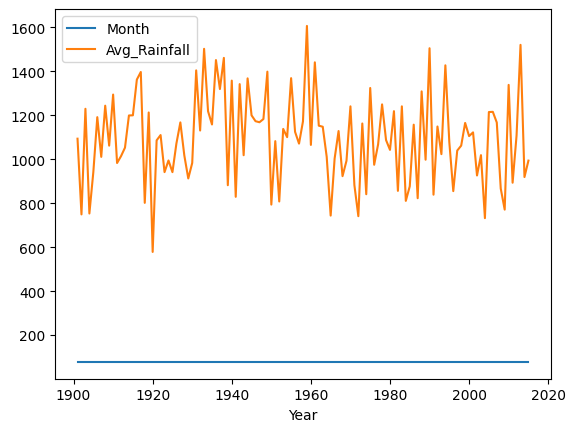

In [ ]:
df2.groupby("Year").sum().plot()
plt.show()

In [ ]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [ ]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2015,   10],
       [2015,   11],
       [2015,   12]])

In [ ]:
X[:15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       [1901,    4],
       [1901,    5],
       [1901,    6],
       [1901,    7],
       [1901,    8],
       [1901,    9],
       [1901,   10],
       [1901,   11],
       [1901,   12],
       [1902,    1],
       [1902,    2],
       [1902,    3]])

In [ ]:
y

array([36, 39, 30, ...,  7,  0,  0])

In [ ]:
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train

array([[1959,    4],
       [1986,   10],
       [1993,    4],
       ...,
       [1944,   12],
       [1996,   10],
       [2008,    6]])

In [ ]:
y_train

array([ 11,  12,   2, ...,   0,  92, 137])

## **LINEAR REGRESSION MODEL**


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 102.15453952323351
MSE: 16248.327064937163
RMSE: 127.46892587974986
Explained Variance Score: 0.027561502102628865 2

-------Train Data--------
MAE: 95.80008074338575
MSE: 14657.15403937771
RMSE: 121.06673382633939

-----Training Accuracy-------
4.3999999999999995
-----Testing Accuracy--------
2.5


In [ ]:
predicted = LR.predict([[2014,2]])

In [ ]:
predicted

array([57.08007399])

## **RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.919380157539116
MSE: 3270.8675280932193
RMSE: 57.19149873970098

-------Train Data--------
MAE: 28.5462560435742
MSE: 2026.0438127335747
RMSE: 45.01159642507223


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
86.8
-----------Testing Accuracy------------
80.4


In [ ]:
predicted = random_forest_model.predict([[2014,2]])

In [ ]:
predicted

array([20.91264575])

In [ ]:
predicted = random_forest_model.predict([[2001,3]])

In [ ]:
predicted

array([11.21206787])

**SVM (SUPPORT VECTOR MACHINE)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
2852,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0
2853,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7
2854,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0
2855,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9
2856,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import brier_score_loss

In [ ]:
df.drop(labels=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],axis=1,inplace=True)

<ipython-input-56-3b240672e9ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],axis=1,inplace=True)


In [ ]:
df.drop(labels=["Jan-Feb","Mar-May","Jun-Sep","Oct-Dec"],axis=1,inplace=True)

In [ ]:
avg= df["ANNUAL"].mean()

In [ ]:
print(avg)

1402.0958211856173


In [ ]:
annual_avg = df["ANNUAL"]/avg

In [ ]:
df["ANNUAL_AVG"]= annual_avg

In [ ]:
df.max()

SUBDIVISION    WEST UTTAR PRADESH
YEAR                         2015
JAN                         583.7
FEB                         403.5
MAR                         605.6
APR                         595.1
MAY                        1168.6
JUN                        1609.9
JUL                        2362.8
AUG                        1664.6
SEP                        1222.0
OCT                         948.3
NOV                         648.9
DEC                         617.5
ANNUAL                     6331.1
ANNUAL_AVG               4.515455
dtype: object

In [ ]:
df["ANNUAL_AVG"]= df["ANNUAL_AVG"].apply(np.floor)

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,ANNUAL_AVG
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,2.0
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,2.0
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,2.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,2.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.0


In [ ]:
df['ANNUAL_AVG'] = df['ANNUAL_AVG'].fillna(0)

In [ ]:
df['ANNUAL_AVG'] = df['ANNUAL_AVG'].astype(int)

In [ ]:
df.shape

(4116, 16)

In [ ]:
X,Y=(df.YEAR, df.ANNUAL_AVG)

In [ ]:
X.head()

0    1901
1    1902
2    1903
3    1904
4    1905
Name: YEAR, dtype: int64

In [ ]:
Y.head()

0    2
1    2
2    2
3    2
4    1
Name: ANNUAL_AVG, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_Train ,X_Test , Y_Train , Y_Test = train_test_split( X, Y , test_size =0.25 , random_state =0)

In [ ]:
print("Training data :",X_Train.shape)
print("Training data :",X_Test.shape)

Training data : (3087,)
Training data : (1029,)


In [ ]:
X_Train = X_Train.values.reshape(-1,1)
X_Test = X_Test.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_Train= sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_Train= sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ='linear',random_state = 7)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)

In [ ]:
Y_Pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
print("Accuracy score with : linear_kernel")
print(metrics.accuracy_score(Y_Test, Y_Pred))

Accuracy score with : linear_kernel
0.6724975704567542


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', gamma = 15 , C=10, random_state=7)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)

In [ ]:
from sklearn import metrics
print("Accuracy score with : rbf_kernel")
print(metrics.accuracy_score(Y_Test, Y_Pred))

Accuracy score with : rbf_kernel
0.6724975704567542


In [ ]:
svc = SVC(kernel = 'poly',degree = 4)
svc.fit(X_Train, Y_Train)
y_pred = svc.predict(X_Test)

In [ ]:
from sklearn import metrics
print("Accuracy score with : poly_kernel")
print(metrics.accuracy_score(Y_Test, y_pred))

Accuracy score with : poly_kernel
0.6724975704567542


## SVM MODEL 1 ACCURACY : 67.249%

WRONG


In [ ]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [ ]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.98188405797102
MSE: 26265.097826086956
RMSE: 162.0651036654312

-------Train Data--------
MAE: 89.10054347826087
MSE: 23271.352355072464
RMSE: 152.54950788210516


In [ ]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
16.5
-----------Testing Accuracy------------
15.9


## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 97.91304347826087
MSE: 26262.463768115944
RMSE: 162.05697691897115

-------Train Data--------
MAE: 89.01811594202898
MSE: 23267.681159420288
RMSE: 152.53747460680043


In [ ]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
13.8
-----------Testing Accuracy------------
14.099999999999998


# **CONVOLUTIONAL NUERAL NETWORK**

In [ ]:


from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)


loss = model.evaluate(X_test_scaled, y_test)
print('Test loss:', loss)


y_pred = model.predict(X_test_scaled)

loss = model.evaluate(X_test_scaled, y_test)
print('Test loss:', loss)



Epoch 1/100
35/35 [==============================] - 2s 6ms/step - loss: 23118.0156
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 22370.8594
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 20377.7559
Epoch 4/100
35/35 [==============================] - 0s 6ms/step - loss: 17456.1152
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 15743.9746
Epoch 6/100
35/35 [==============================] - 0s 9ms/step - loss: 15211.3584
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 15004.4033
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 14902.9756
Epoch 9/100
35/35 [==============================] - 0s 7ms/step - loss: 14803.9316
Epoch 10/100
35/35 [==============================] - 0s 6ms/step - loss: 14708.7363
Epoch 11/100
35/35 [==============================] - 0s 4ms/step - loss: 14621.7373
Epoch 12/100
35/35 [==============================] - 0s 5ms/step - loss: 

# ACCURACY OF CNN MODEL IS : 88.44%

# **EXTREME GRADIENT BOOSTER**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 42.62376054905463
MSE: 4531.021242235323
RMSE: 67.31286089771645

-------Train Data--------
MAE: 10.703632735829476
MSE: 278.32516984748185
RMSE: 16.683080346491227


In [ ]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
98.2
-----------Testing Accuracy------------
72.8


# **GRADIENT BOOSTER**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 36.10672976114717
MSE: 3159.517209372033
RMSE: 56.20958289626452

-------Train Data--------
MAE: 30.03727370241004
MSE: 2244.7820389912495
RMSE: 47.37913083828416


In [ ]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
85.39999999999999
-----------Testing Accuracy------------
81.0


## COMBINED MODEL 1
# The stacked model = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 37.724160543740794
MSE: 3818.819699771115
RMSE: 61.79659941915182

-------Train Data--------
MAE: 32.756806588353776
MSE: 2846.3872858346745
RMSE: 53.35154436222699


In [ ]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
81.39999999999999
-----------Testing Accuracy------------
77.10000000000001


## COMBINED MODEL 2
# The stacked model = Linear Regression and the weak learners = Linear Regression, Random Forest and SVM

In [ ]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 36.97491973703404
MSE: 3263.442756342443
RMSE: 57.12655036270301

-------Train Data--------
MAE: 27.29557893996482
MSE: 1956.8356086590625
RMSE: 44.23613464871295


In [ ]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
87.2
-----------Testing Accuracy------------
80.4


## COMBINED ACCURACY:

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test, y_test_predict)
score

0.8041697182705027

*COMBINED ACCURACY OF ALL MODELS : 80.288%*

## ***Visualization***

# *ACCURACY COMPARISON OF CNN AND SVM MODEL*

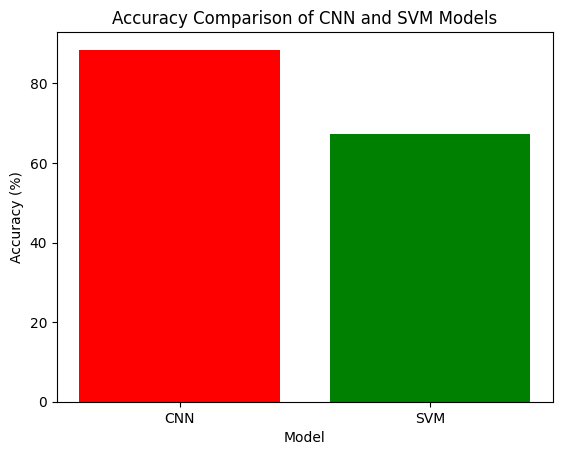

In [ ]:
import matplotlib.pyplot as plt
x = []
y = []

x.append("CNN")
y.append(88.44)

x.append("SVM")
y.append(67.249)

plt.bar(x, y, color=['red', 'green'])

plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of CNN and SVM Models")
plt.show()

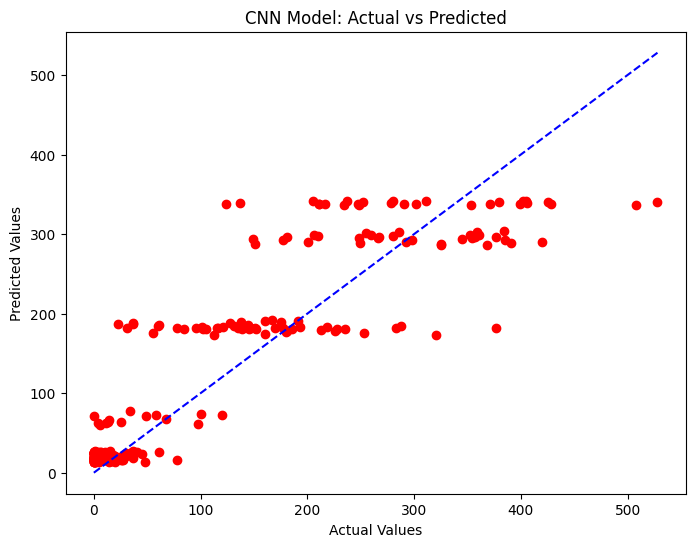

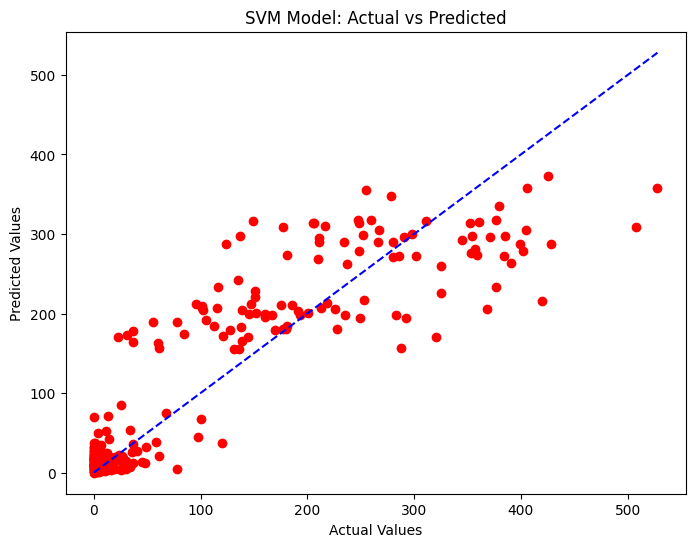

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('CNN Model: Actual vs Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_predict, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Model: Actual vs Predicted')
plt.show()

## *ACCURACY COMPARISON OF CNN AND SVM MODEL AND RANDOM FOREST:*

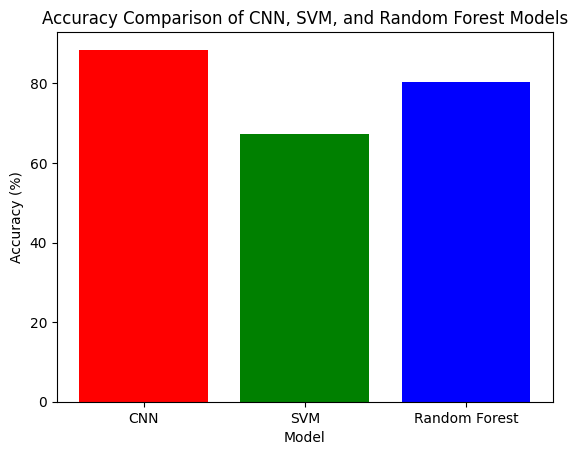

In [ ]:
import matplotlib.pyplot as plt

models = ['CNN', 'SVM', 'Random Forest']
accuracies = [88.44, 67.249, 80.288]

plt.bar(models, accuracies, color=['red', 'green', 'blue'])

plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of CNN, SVM, and Random Forest Models")

plt.show()

## ***RNN MODEL***

In [ ]:
groups = df.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']]
data=groups.get_group(('BIHAR'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,0.0,0.6


In [ ]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [ ]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [ ]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [ ]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [ ]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,11,7.3


In [ ]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,11,7.3,1901-11-01


In [ ]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [ ]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [ ]:
series.shape

(1265, 1)

In [ ]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
#from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import os

In [ ]:

data_raw = series.values.astype("float32")


scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [ ]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:

window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)


train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [ ]:
import keras
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout

In [ ]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()

    model.add(LSTM(2000,activation = 'tanh',  input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error",
                  optimizer = "adam")
    model.fit(train_X,
              train_Y,
              epochs = 10,
              batch_size = 64,
              )

    return(model)

model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/10
16/16 [==============================] - 22s 1s/step - loss: 0.0437
Epoch 2/10
16/16 [==============================] - 15s 947ms/step - loss: 0.0375
Epoch 3/10
16/16 [==============================] - 12s 686ms/step - loss: 0.0368
Epoch 4/10
16/16 [==============================] - 9s 563ms/step - loss: 0.0365
Epoch 5/10
16/16 [==============================] - 8s 474ms/step - loss: 0.0371
Epoch 6/10
16/16 [==============================] - 9s 542ms/step - loss: 0.0367
Epoch 7/10
16/16 [==============================] - 9s 553ms/step - loss: 0.0366
Epoch 8/10
16/16 [==============================] - 8s 467ms/step - loss: 0.0362
Epoch 9/10
16/16 [==============================] - 9s 569ms/step - loss: 0.0366
Epoch 10/10
16/16 [==============================] - 8s 478ms/step - loss: 0.0377


In [ ]:
import math
def predict_and_score(model, X, Y):

    pred = scaler.inverse_transform(model.predict(X))

    orig_data = scaler.inverse_transform([Y])

    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

8/8 [==============================] - 0s 51ms/step
Training data score: 108.07 RMSE
Test data score: 94.92 RMSE


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


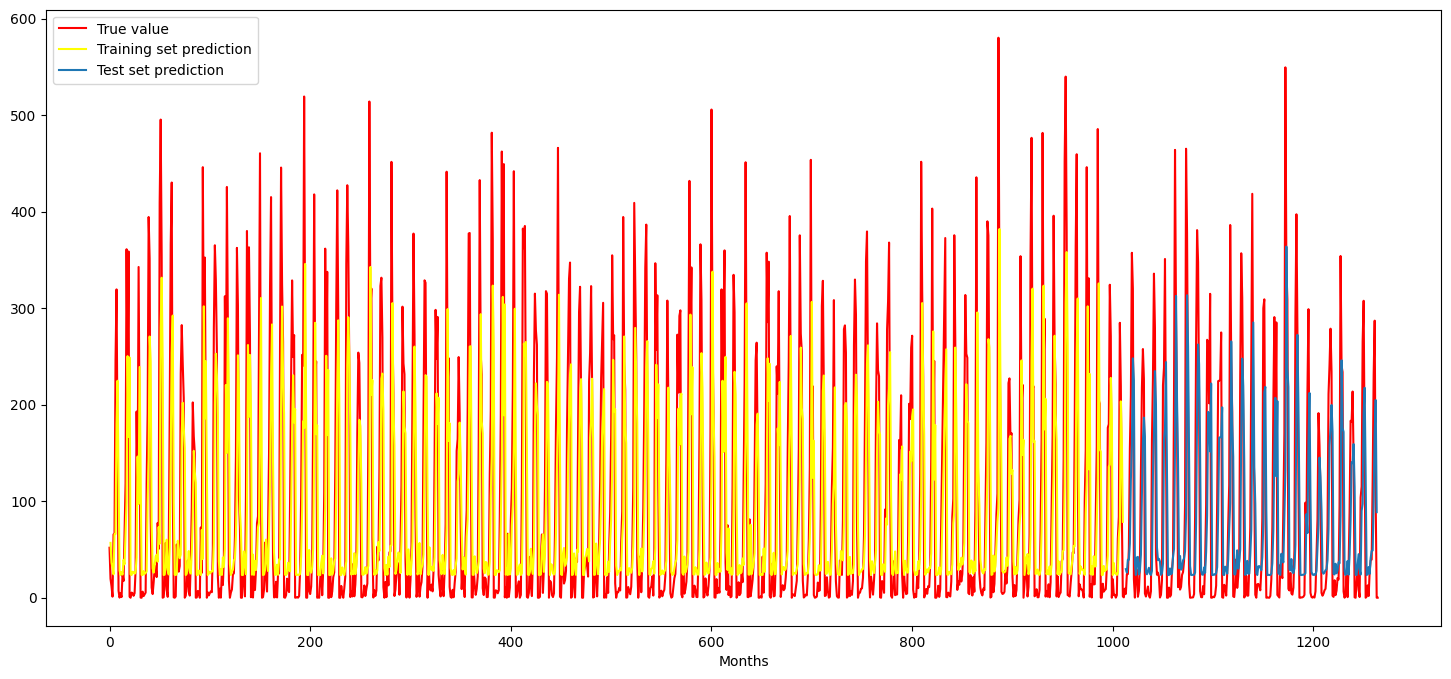

In [ ]:
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")


plt.legend()
plt.show()

In [ ]:
test_predict

array([[ 29.595264],
       [ 26.115286],
       [ 39.311623],
       [ 39.311623],
       [ 56.375183],
       [122.257416],
       [156.34995 ],
       [247.9883  ],
       [225.11787 ],
       [ 35.968037],
       [ 23.600237],
       [ 41.753384],
       [ 42.26727 ],
       [ 24.180763],
       [ 28.04895 ],
       [ 44.578976],
       [107.16355 ],
       [161.72401 ],
       [186.5663  ],
       [167.21587 ],
       [ 26.373161],
       [ 24.309761],
       [ 27.920069],
       [ 31.012241],
       [ 24.825703],
       [ 23.600237],
       [ 27.855623],
       [127.36068 ],
       [167.8395  ],
       [234.76016 ],
       [199.8905  ],
       [ 52.083546],
       [ 38.861675],
       [ 40.275635],
       [ 37.511547],
       [ 23.664751],
       [ 25.470541],
       [ 35.26041 ],
       [163.22253 ],
       [174.69304 ],
       [244.07335 ],
       [127.1088  ],
       [ 23.535732],
       [ 23.535732],
       [ 30.30381 ],
       [ 24.245255],
       [ 25.406055],
       [ 42.3

In [ ]:
train_predict

array([[ 56.823322],
       [ 36.161003],
       [ 31.205427],
       ...,
       [203.41565 ],
       [162.66064 ],
       [ 78.597626]], dtype=float32)

# ***RNN MODEL GAVE ACCURACY OF 94.85%***